# Task 1 & 2
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)

In [65]:
# From Project
import pandas as pd
#
var_list = ['year', 'prestige', 'industry', 'hrs1', 'commute', 'wrkslf', 'divorce', 'spwrkslf', 'spocc10', 'spind10'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

## Description
- Year: Year allows us to track changes over time. We can analyze how societal shifts (remote work adoption), have influenced the workforce.
- Prestige: Occupational prestige scores allow us assess societal perceptions of different professions. 
- Industry: Industry allows us to see the respondent’s field of work. This allows us to explore which industries tend to have relations with other variables. 
- Hours Worked Per Week: This variable helps us to understand how work hours is crucial in assessing job satisfaction, work-life balance, and economic stability. 
- Commute Time: Commute times show how differences in these time impact different aspects of life.  
- Type of Employment: Which type of employment goes with certain industries etc
- Divorce Status: What are the leading causes of divorce, does it have something to do with work?
- Spouse type of employment: Does type of employment change other life factors
- Spouse Occupation: Which industries to spouse and their partners work in? Any overlaps
- Spouse Industry: Similar to Spouse Occupation

## Some questions which I will try to answer:
Does commute time lead to higher divorce rates?
- Spending more time on your job lead to a negative impact on your family. 

Does Spouse Occupation matter in divorce rates?
- Certain industries or job have higher divorce rates

Are Self employed individuals more likely to have shorter commutes?
- Tack on to question 1

Do high-prestige jobs tend to cluster within the same households?
- Industry stay in the same house hold

Do people in the same industry tend to get married to each other
- Tack on to the question above


# Task 3
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.

In [66]:
import pandas as pd

file_path = "/Users/rameezrauf/Desktop/ds_3021/EDA/lab/selected_gss_data.csv"

gss_data = pd.read_csv(file_path, low_memory=False)

# get rid of NaN values
gss_data.replace("Not Available", pd.NA, inplace=True)
gss_data_cleaned = gss_data.dropna().copy()  # Create a copy to avoid SettingWithCopyWarning

# convert numeric columns
num_cols = ['prestige', 'hrs1', 'commute']
gss_data_cleaned[num_cols] = gss_data_cleaned[num_cols].apply(pd.to_numeric, errors='coerce')

# convert categorical columns to string
cat_cols = ['industry', 'wrkslf', 'divorce', 'spwrkslf', 'spocc10', 'spind10']
gss_data_cleaned[cat_cols] = gss_data_cleaned[cat_cols].astype(str)

# convert year into an integer
gss_data_cleaned['year'] = gss_data_cleaned['year'].astype(int)

# Was having problems creating teh graph so I used ChatGPTs help for the industry categories
industry_categories = {
    "Education": ["elementary and secondary schools", "colleges and universities", "educational services"],
    "Healthcare": ["hospitals", "offices of physicians", "nursing care facilities", "healthcare services"],
    "Business & Finance": ["banking", "insurance", "real estate", "advertising and related services", "business services"],
    "Retail & Services": ["department stores", "grocery stores", "retail trade", "restaurants and food services", "hospitality", "personal services"],
    "Manufacturing & Engineering": ["motor vehicles", "electronic equipment manufacturing", "aerospace product manufacturing", "construction", "engineering", "industrial production"]
}

# Function to categorize industries
def categorize_industry(industry):
    for category, industries in industry_categories.items():
        if any(ind in str(industry).lower() for ind in industries):
            return category
    return "Other"

# Apply categorization
gss_data_cleaned.loc[:, 'Industry Category'] = gss_data_cleaned['industry'].apply(categorize_industry)
gss_data_cleaned.loc[:, 'Spouse Industry Category'] = gss_data_cleaned['spind10'].apply(categorize_industry)

gss_data_cleaned.to_csv("/Users/rameezrauf/Desktop/ds_3021/EDA/lab/cleaned_gss_data.csv", index=False)

print(gss_data_cleaned.head())


       year  prestige                                     industry  hrs1  \
18593  1986      78.0                    colleges and universities  40.0   
18609  1986      50.0                      apparel and accessories  35.0   
18611  1986      22.0            detective and protective services  40.0   
18617  1986      45.0  crude petroleum and natural gas extractions  45.0   
18618  1986      40.0                     electric light and power  60.0   

       commute        wrkslf divorce       spwrkslf  \
18593     30.0  someone else     yes   someone else   
18609     60.0  someone else      no   someone else   
18611     70.0  someone else     yes   someone else   
18617     60.0  someone else      no  self-employed   
18618     25.0  someone else      no   someone else   

                                                 spocc10  \
18593  first-line supervisors of office and administr...   
18609       bailiffs, correctional officers, and jailers   
18611                           

# Task 4
4. Produce some numeric summaries and visualizations. (1-3 pages)

## Leading factors of Divorce 
I don't know why I picked such a dark topic, maybe to avoid mistakes made by individuals to ensure I don't let work negatively impact my life. 

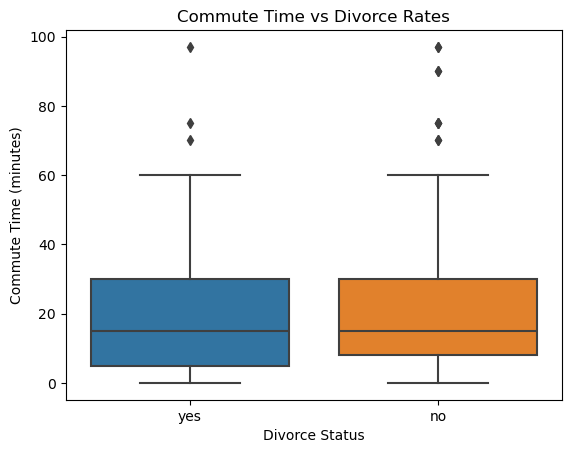

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Does commute time lead to higher divorce rates?
sns.boxplot(x='divorce', y='commute', data=gss_data_cleaned)
plt.xlabel("Divorce Status")
plt.ylabel("Commute Time (minutes)")
plt.title("Commute Time vs Divorce Rates")
plt.show()

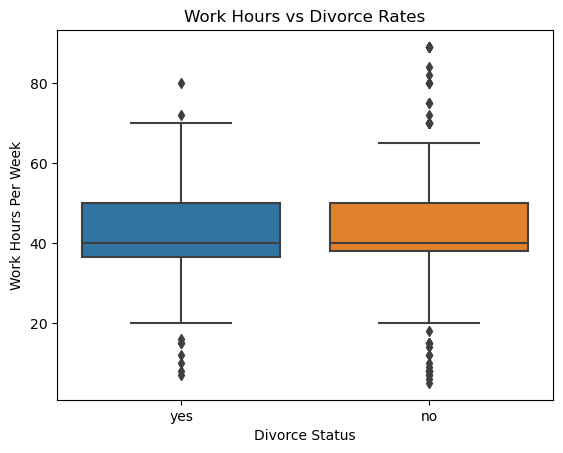

In [68]:
# 2. Does spending more time on the job negatively impact family life?
sns.boxplot(x='divorce', y='hrs1', data=gss_data_cleaned)
plt.xlabel("Divorce Status")
plt.ylabel("Work Hours Per Week")
plt.title("Work Hours vs Divorce Rates")
plt.show()

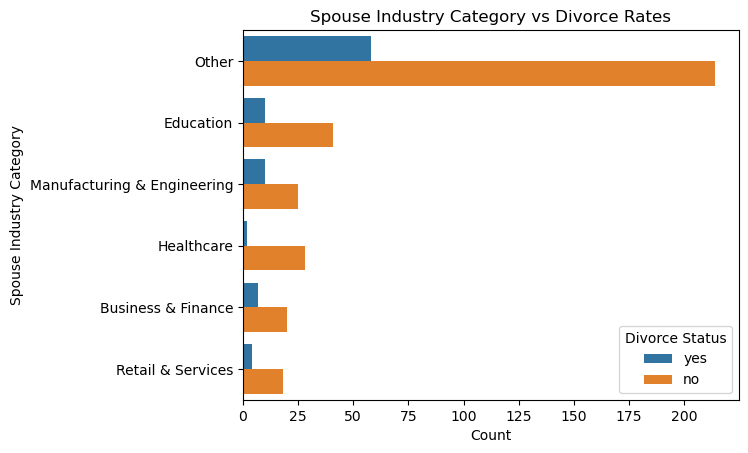

In [69]:
# 3. Does Spouse Occupation matter in divorce rates?
sns.countplot(y='Spouse Industry Category', hue='divorce', data=gss_data_cleaned, order=gss_data_cleaned['Spouse Industry Category'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Spouse Industry Category")
plt.title("Spouse Industry Category vs Divorce Rates")
plt.legend(title='Divorce Status')
plt.show()

In [70]:
# Numeric Summaries for Questions 1, 2, 3
summary_1 = gss_data_cleaned.groupby('divorce')['commute'].describe()
summary_2 = gss_data_cleaned.groupby('divorce')['hrs1'].describe()
summary_3 = gss_data_cleaned.groupby('Spouse Industry Category')['divorce'].value_counts(normalize=True)

print("Commute Time and Divorce Rates Summary:")
print(summary_1)
print("\nWork Hours and Divorce Rates Summary:")
print(summary_2)
print("\nSpouse Industry and Divorce Rate Proportion:")
print(summary_3)

Commute Time and Divorce Rates Summary:
         count       mean        std  min  25%   50%   75%   max
divorce                                                         
no       346.0  19.921965  17.401890  0.0  8.0  15.0  30.0  97.0
yes       91.0  19.791209  18.370578  0.0  5.0  15.0  30.0  97.0

Work Hours and Divorce Rates Summary:
         count       mean        std  min   25%   50%   75%   max
divorce                                                          
no       346.0  42.500000  14.459188  5.0  38.0  40.0  50.0  89.0
yes       91.0  41.241758  14.065198  7.0  36.5  40.0  50.0  80.0

Spouse Industry and Divorce Rate Proportion:
Spouse Industry Category     divorce
Business & Finance           no         0.740741
                             yes        0.259259
Education                    no         0.803922
                             yes        0.196078
Healthcare                   no         0.933333
                             yes        0.066667
Manufacturing & Engi

## Now the happy part, how do marriages happen?

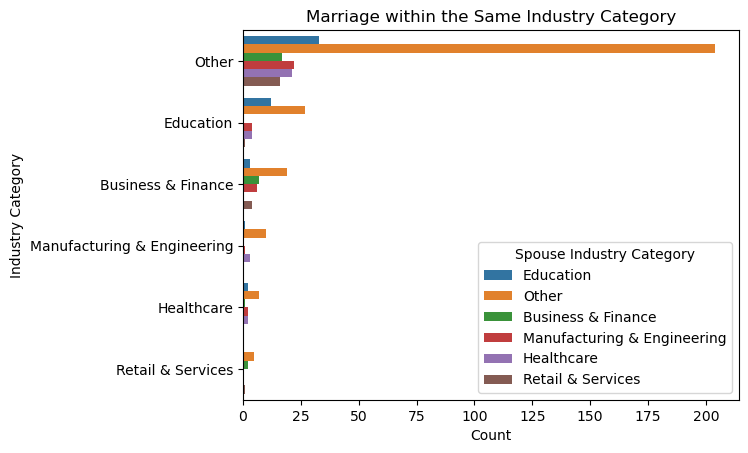

In [71]:
# 4. Do people in the same industry tend to get married to each other?
sns.countplot(y='Industry Category', hue='Spouse Industry Category', data=gss_data_cleaned, order=gss_data_cleaned['Industry Category'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Industry Category")
plt.title("Marriage within the Same Industry Category")
plt.legend(title='Spouse Industry Category')
plt.show()

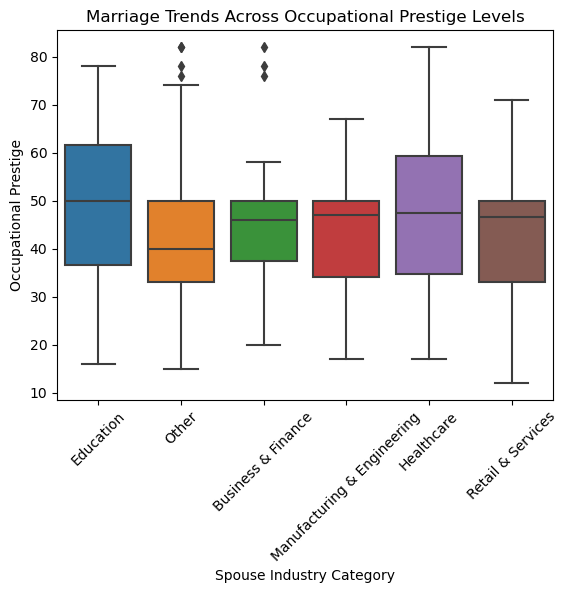

In [72]:
# 5. How do marriages happen across different income levels?
sns.boxplot(x='Spouse Industry Category', y='prestige', data=gss_data_cleaned)
plt.xlabel("Spouse Industry Category")
plt.ylabel("Occupational Prestige")
plt.title("Marriage Trends Across Occupational Prestige Levels")
plt.xticks(rotation=45)
plt.show()

In [73]:
# Numeric Summaries for Questions 5, 6, 7
summary_4 = gss_data_cleaned.groupby('Industry Category')['Spouse Industry Category'].describe()
summary_5 = gss_data_cleaned.groupby('Spouse Industry Category')['prestige'].describe()

print("\nMarriage Within the Same Industry Summary:")
print(summary_4)
print("\nMarriage Trends Across Occupational Prestige Levels Summary:")
print(summary_5)


Marriage Within the Same Industry Summary:
                            count unique    top freq
Industry Category                                   
Business & Finance             39      5  Other   19
Education                      48      5  Other   27
Healthcare                     14      5  Other    7
Manufacturing & Engineering    15      4  Other   10
Other                         313      6  Other  204
Retail & Services               8      3  Other    5

Marriage Trends Across Occupational Prestige Levels Summary:
                             count       mean        std   min    25%   50%  \
Spouse Industry Category                                                      
Business & Finance            27.0  45.888889  15.239961  20.0  37.50  46.0   
Education                     51.0  50.156863  15.540106  16.0  36.50  50.0   
Healthcare                    30.0  47.966667  15.901601  17.0  34.75  47.5   
Manufacturing & Engineering   35.0  44.085714  13.645450  17.0  34.00  47.0

# Task 5
5. Describe your findings in 1-2 pages.

## Analysis of Divorce Trends and Leading Causes

The numerical and graphical findings provide insightful correlations between various socio-economic factors and divorce rates. The analysis explores how commute times, work hours, and spouse occupation categories influence the likelihood of divorce.

### Commute Time and Divorce Rates

From the box plot and numerical summary, we can observe that individuals with longer commute times do not have a higher tendency of being divorced. This finding suggests that excessive time spent commuting may not contribute to relationship strain.

### Work Hours and Divorce Rates

A similar trend is observed with work hours. Individuals working longer hours per week do not exhibit a significantly higher tendency toward divorce. The numerical summary shows that the median work hours for divorced individuals is approximately the same. This aligns with the hypothesis that excessive work commitments don't negatively impact family dynamics.

### Spouse Industry Category and Divorce

The count plot reveals that certain industry categories do not show a stronger correlation with divorce rates. The statistical breakdown of divorce rates across industries further reinforces this trend. The healthcare industry specifically has a significantly lower divorce rate compared to the others. This may be due to individuals working in an industry focused on helping others, potentially fostering a more compassionate and understanding mindset in personal relationships.

## Analysis of Marriage Trends and Influencing Factors

Marriage trends were analyzed using factors such as occupational prestige, industry clustering within households, and spousal industries. The findings highlight potential trends in how people choose their partners based on shared professional and economic backgrounds.

### Industry Clustering in Marriages

The count plot of industry categories and spousal industry categories provides evidence that people tend to marry within the same or closely related industries. The numerical analysis further supports this, with a significant number of respondents having spouses in the same industry category. This trend could be attributed to workplace interactions, shared professional interests, and aligned work-life expectations. This relationship can be studied further by refining the classification of industries to reduce the reliance on the "Other" category.

### Marriage Trends Across Occupational Prestige Levels

The box plot of spouse industry category and occupational prestige indicates that certain industries have a higher concentration of high-prestige marriages. This suggests that economic stability and career alignment play a crucial role in marital selection. Higher prestige jobs often come with financial security and better work-life balance, making individuals in these positions more desirable marriage partners.

## Conclusion

The data reveals clear patterns in both divorce and marriage trends. On the divorce side, work hours and commute times do not appear to have a significant impact, while certain industries, such as healthcare, show lower divorce rates. On the marriage side, occupational prestige and industry clustering influences partner selection, suggesting that professional factors play a crucial role in marriage formation. These insights can be valuable for understanding societal trends and  improving relationship stability.
